In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

/Users/ethender/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Task1:
a. Use Pandas to load both trainingSet.csv and testingSet.csv (1 mark).
Loaded the Training set and Test set

In [2]:
trainingSet = pd.read_csv('trainingSet.csv')
testSet = pd.read_csv('testingSet.csv')
trainingSet

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,DEFECTIVE
0,0,1,0,0,1,1,1,7,12,19,7,4,9,1
1,2,1,0,0,1,1,1,6,8,8,6,4,10,-1
2,3,9,0,3,1,1,1,24,22,33,13,11,33,1
3,0,1,0,0,1,1,1,1,1,2,1,2,4,-1
4,0,1,0,0,1,1,1,7,10,15,8,8,12,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,12,39,6,20,20,12,7,91,140,200,61,20,131,-1
360,22,31,0,7,16,13,11,101,130,192,57,26,132,1
361,0,1,0,0,1,1,1,3,3,5,3,5,5,-1
362,4,7,0,11,4,4,1,23,23,38,14,10,40,-1


Task1
b) Find the number of patterns in each class for both loaded data sets using Python 


Found the Pattern for each class 

Categorical Data:
    - DEFECTIVE
Numerical Data:
    - Loc_Blank
    - Branch_count
    - LOC_CODE_AND_COMMENT
    - LOC_COMMENTS
    - CYCLOMATIC_COMPLEXITY
    - DESIGN_COMPLEXITY
    - ESSENTIAL_COMPLEXITY
    - LOC_EXECUTABLE
    - NUM_OPERANDS
    - NUM_OPERATORS
    - NUM_UNIQUE_OPERANDS
    - NUM_UNIQUE_OPERATORS
    - LOC_TOTAL

Dividing Independent data and dependent data

In [3]:
trainX = trainingSet.loc[:,:'LOC_TOTAL']
trainY = trainingSet.loc[:,'DEFECTIVE']
testX = testSet.loc[:,:'LOC_TOTAL']
testY = testSet.loc[:,'DEFECTIVE']

In [4]:
patternCount = (len(trainY.loc[trainY == -1]),len(trainY.loc[trainY == 1]))
print("Non-Defective: ",patternCount[0],"\nDefective: ",patternCount[1])

Non-Defective:  182 
Defective:  182


For More information about the data. Finding Correlation between Data. 
As it seems Below categories has Strong Correlations between them.

1. CYCLOMATIC_COMPLEXITY
2. DESIGN_COMPLEXITY
3. ESSENTIAL_COMPLEXITY



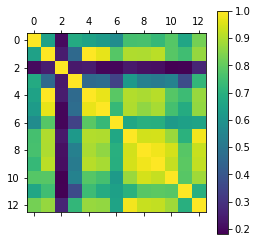

In [5]:
plt.matshow(trainX.corr())
plt.colorbar()

Task1
c) Choose an attribute and generate a boxplot for the two classes in the training set

Using Box Plot for Design Complexity for defective and non defective 

(0, 40)

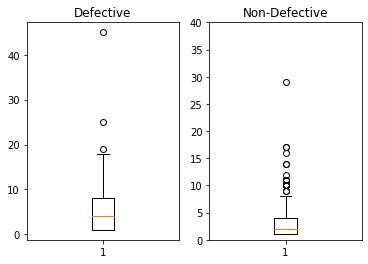

In [6]:
defectTrain = trainX.iloc[np.where(trainY == 1)]
ndefectTrain = trainX.iloc[np.where(trainY == -1)]
plt.subplot(1,2,1)
plt.boxplot(defectTrain.loc[defectTrain.index,'DESIGN_COMPLEXITY'])
plt.title('Defective')
plt.subplot(1,2,2)
plt.boxplot(ndefectTrain.loc[ndefectTrain.index,'DESIGN_COMPLEXITY'])
plt.title('Non-Defective')
plt.ylim(0,40)

Task1
d) Show one scatter plot, that is, one feature against another feature. It is your choice to show which
two features you want to use. You need to use the training set

Scatter plot against Design complexity vs CYCLOMATIC_COMPLEXITY
Result:
As the Design Complexity increases The Cyclomatic Complexity as also increases.
Data is showing exponential growth.

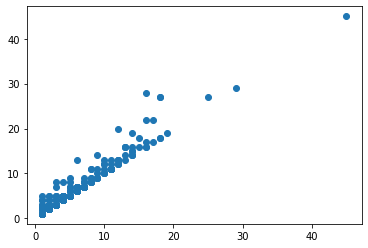

In [7]:
plt.scatter(trainX.loc[:,'DESIGN_COMPLEXITY'],trainX.loc[:,'CYCLOMATIC_COMPLEXITY'])

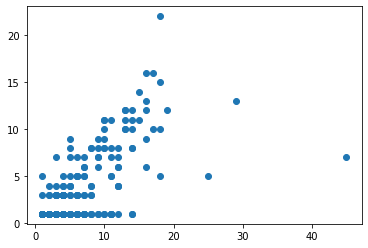

In [8]:
plt.scatter(trainX.loc[:,'DESIGN_COMPLEXITY'],trainX.loc[:,'ESSENTIAL_COMPLEXITY'])

Task 1
e) Divide the original training set into a smaller training set (II) and a validation set. In this task, you
need to use 55% of total training data points as the validation set

Dividing Training Set 
    - Training set 45%
    - Validation set 55%

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
code_Training_X,code_Validation_X,code_training_Y,code_Validation_Y = train_test_split(trainX,trainY,test_size=0.55,random_state=42)

<h1>PCA</h1>
<p>a. Perform a PCA analysis on the original training data set </p>

In [11]:
code_Training_X

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL
310,0,1,0,2,1,1,1,4,3,7,2,6,8
250,1,5,1,5,3,3,1,24,33,40,13,12,34
120,1,7,0,0,4,4,3,12,19,30,8,14,15
280,0,1,0,0,1,1,1,6,4,1,4,1,8
209,16,15,0,19,8,7,5,88,116,156,59,18,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,3,7,0,0,4,4,1,11,34,52,21,11,16
106,2,3,0,0,2,2,1,14,11,22,7,9,18
270,2,11,0,0,6,6,3,37,43,71,20,18,44
348,7,33,1,2,17,17,10,79,63,141,26,16,91


In [12]:
pcColumnNames = []
for i in range(1,14):
    pcColumnNames.append('PC'+str(i))

In [13]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
scalar = StandardScaler()
normalised_data = scalar.fit_transform(trainX)
pca = PCA(n_components=13)
codeTrainPCA = pca.fit_transform(normalised_data)
principal_component_DF = pd.DataFrame(data=codeTrainPCA,columns=pcColumnNames)
principal_component_DF.tail()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
359,7.744635,5.923184,4.650574,-0.171783,0.700800,0.108545,-0.796502,1.158606,0.055608,-0.717879,-0.168391,-0.105099,-0.022531
360,7.144156,-0.566062,-0.789857,-1.044655,-1.185891,-0.799060,0.715051,-0.139595,-0.204545,-0.243865,-0.034647,0.015533,-0.025846
361,-2.772474,0.012934,0.045608,0.477666,-0.147097,-0.176938,0.022598,0.063324,0.101304,0.028445,0.012273,0.002511,-0.020033
362,-0.527739,0.975864,-0.996385,0.700515,-0.265846,0.694807,-0.146325,0.256976,-0.026150,-0.035737,-0.007242,-0.012170,-0.008238
363,1.813310,0.399288,0.804280,-0.605968,-0.012705,-0.647596,0.092590,-0.034235,-0.324230,0.034798,0.060096,0.026300,0.044582


In [14]:
test_normalised = scalar.fit_transform(testX)
codeTestPCA = pca.fit_transform(test_normalised)
pc_test_Df = pd.DataFrame(data=codeTestPCA,columns=pcColumnNames)
pc_test_Df.tail()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
131,1.238751,0.464309,-1.734502,-0.120042,-0.429827,0.138743,0.416658,-0.129755,-0.046953,-0.140427,-0.047527,-0.040223,-0.001137
132,0.612569,-0.465321,0.524918,-0.370464,0.000630,0.155115,-0.447765,-0.092937,0.095679,-0.077284,-0.019992,-0.012820,0.003772
133,-2.585034,0.041646,-0.324537,0.420174,0.528864,-0.208226,-0.117192,0.050921,0.068790,0.050847,0.038009,-0.019715,0.001065
134,-2.394771,-0.003274,-0.277185,0.409977,0.345994,-0.247220,-0.100609,-0.005448,0.064823,0.044776,0.024341,-0.043983,-0.000669
135,-1.646148,-0.044965,0.178638,-0.199601,-0.106839,-0.117197,-0.401828,0.145874,-0.036889,-0.072934,0.014487,0.047653,0.001624


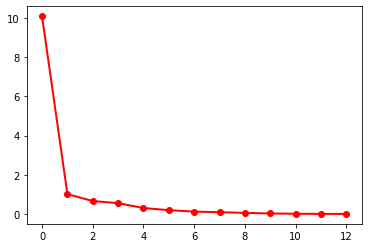

In [15]:
plt.plot(pca.explained_variance_, 'ro-', linewidth=2)

https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

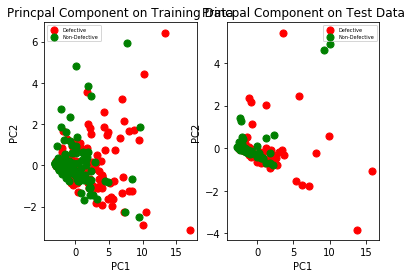

In [16]:
# Training Data
colors = ['r','g']
targets = [1,-1]
legends = ['Defective','Non-Defective']
plt.subplot(1,2,1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Princpal Component on Training Data')
for target, color in zip(targets,colors):
    indicesToKeep = trainingSet['DEFECTIVE'] == target
    plt.scatter(principal_component_DF.loc[indicesToKeep, 'PC1']
               , principal_component_DF.loc[indicesToKeep, 'PC2'], c = color, s = 50)
plt.legend(legends,prop={'size': 5})
# Test Data
plt.subplot(1,2,2)
colors = ['r','g']
targets = [1,-1]
legends = ['Defective','Non-Defective']
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Princpal Component on Test Data')
for target, color in zip(targets,colors):
    indicesToKeep = testSet['DEFECTIVE'] == target
    plt.scatter(pc_test_Df.loc[indicesToKeep, 'PC1']
               , pc_test_Df.loc[indicesToKeep, 'PC2'], c = color, s = 50)
plt.legend(legends,prop={'size': 5})

<h1>Task 3</h1>
<p>
        Do a classification using the Naïve Bayes Classification model
    <ol><li>Train the model using the original training set and report the performance on the test set including accuracy rate.</li></ol>
</p>

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [21]:
nb = GaussianNB()
nb.fit(trainX,trainY)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
predicted_Y_Test_values = nb.predict(testX)

In [23]:
print('Accuracy: ',metrics.accuracy_score(testY,predicted_Y_Test_values))

Accuracy:  0.6176470588235294


<h1>
  Task4
</h1>
<p>
  <b>Investigate how the number of features in the training dataset affects the model performance on the validation set</b>
  <ol>
    <li>Use the training set (II) to train 13 Naïve Bayes Classification models, with 13 different feature sets. That is: the first one is to use the 1st feature only; the second one is to use the 1st and the 2nd features; the third one is to use the 1st, 2nd, and 3rd features, the fourth one is to use the first 4 features, and so on.
Measure the accuracy rate on both the training set and the validation set. Report the results by plotting them in a figure: that is, a plot of the accuracy rate against the number of features used in each model. There should be two curves in this figure: one for the training set (II); the other one for the validation set</li>
    <li>Report what is the best number of features you would like to use in this work and explain why you choose it. Write it down in your Jupyter notebook </li>
    <li>Use the selected number of features to train the model and report the performance on the test set</li>
</ol>
</p>

In [35]:
trainset_x_1,trainset_x_2,trainset_y_1,trainset_y_2 = train_test_split(code_Training_X,code_training_Y,test_size=0.50,random_state=42)

In [36]:
trainAccuracy = []
validAccuracy = []
for i in range(1,14):
    nb = GaussianNB()
    nb.fit(trainset_x_1.iloc[:,:i],trainset_y_1)
    trainAccuracy.append(metrics.accuracy_score(trainset_y_2,nb.predict(trainset_x_2.iloc[:,:i])))
    validAccuracy.append(metrics.accuracy_score(code_Validation_Y,nb.predict(code_Validation_X.iloc[:,:i])))

Text(0.5, 1.0, 'Naive Bayes Feature Accuracy')

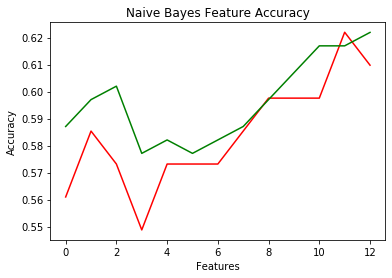

In [39]:
plt.plot(trainAccuracy,'r-',label='Train')
plt.plot(validAccuracy,'g-',label='Validation')
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Feature Accuracy')